<a href="https://colab.research.google.com/github/xtianu/CV_Tirana/blob/main/M4_Deep%20Learning/p2_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MODULE 4: DEEP LEARNING

Christian Mata, PhD


# PART 2: Image Classification

In [ ]:
# *************************** CNN EXAMPLE **************************************
#                 (Convolutional Neural Network (CNN))
# Author: Christian Mata
# Version: 1.0

# Description: This program is a CNN example in order to classify images.
#              It is using a KERAS dependencies

In [ ]:
# # -------------------------- STEP 1: INSTALL ---------------------------------
#
# KERAS install the dependencies / packages.
# If you don’t already have these packages installed, run the following command
# in your terminal, command prompt or, Google Colab website
# (depending on where you have your python programming language installed).

# i.e. ---->  pip install tensorflow keras numpy skimage matplotlib

In [1]:
!pip install keras

In [ ]:
# -------------------------- STEP 2: PRE-PROCESSING ----------------------------

# *************************** Load data ****************************************
#
# load the data set into the variables x_train (the variable that contains the
# images to train on),
# y_train (the variable that contains the labels of the images in the training
# set),
# x_test (the variable that contains the images to test on), and the y_test
# (the variable that contains the labels of the images in the test set).

In [2]:
#Load the data
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
# *************************** Explore the data *********************************
#
# Print the data type of the loaded data sets. This will let us know what type
# of data we are working with.

In [4]:
#Print the data type of x_train
print(type(x_train))#Print the data type of y_train
print(type(y_train))#Print the data type of x_test
print(type(x_test))#Print the data type of y_test
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [5]:
# Get the shape of the x_train , y_train , x_test and y_test data. You will
# notice that the shape of the x_train data set is a 4-Dimensional array with
# 50,000 rows of 32 x 32 pixel image with depth = 3 (RGB) where R is Red,
# G is Green, and B is Blue. The y_train data shape is a 2-Dimensional array
# with 50,000 rows and 1 column. The shape of the x_test data set is a 4-Dimens.
# array with 10,000 rows of 32 x 32 pixel image with depth = 3 (RGB).
# The y_test data shape is a 2-Dimensional array with 10,000 rows and 1 column.


![alt text](https://miro.medium.com/max/430/1*aI0t2dCC8uq-ARnwWiGZkQ.png)

RGB values in each pixel cell. Source: http://shutha.org/node/789

In [6]:
#Get the shape of x_train
print('x_train shape:', x_train.shape)#Get the shape of y_train
print('y_train shape:', y_train.shape)#Get the shape of x_train
print('x_test shape:', x_test.shape)#Get the shape of y_train
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
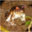

In [7]:
# Take a look at the first image (at index=0) in the training data set as
# a numpy array This shows the image as a series of pixel values.
x_train[0]

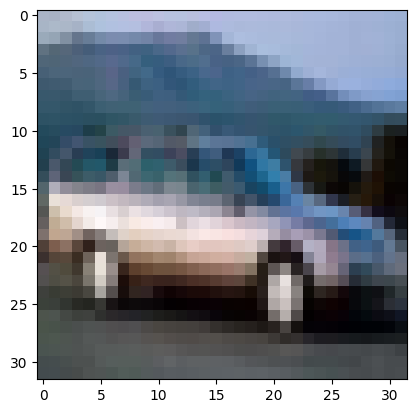

In [8]:
# Show the image as an image instead of a series of pixel values using:
# matplotlib.
import matplotlib.pyplot as plt
img = plt.imshow(x_train[4])

In [9]:
# Print the label of the image. Notice the label printed was the number 6
# which corresponds to the frog label.
print('The label is:', y_train[4])

The label is: [1]


![alt text](https://miro.medium.com/max/608/1*P4S0Tq7JbZVRjH_xctS-Rg.png)

In [10]:
# *************************** Encoding data ************************************
#
# Use One-Hot Encoding to convert the labels into a set of 10 numbers to input
# into the neural network. The numbers of course corresponds with the number of
# labels to classify the images.
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [11]:
# Print all of the new labels in the training data set.
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [12]:
# Print an examp. of the new labels using the 1st image in the training data set
# NOTE: The label 6 = [0,0,0,0,0,0,1,0,0,0]
print('The one hot label is:', y_train_one_hot[1])

The one hot label is: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [13]:
# *************************** Normalization data *******************************
#
# Normalize the pixels in the images to be a value between 0 and 1,
# they are normally values between 0 and 255, doing this will help the NN.
x_train = x_train / 255
x_test = x_test / 255

In [14]:
# ----------- STEP 3: Build The Convolution Neural Network Model  --------------
#
# ******************** Create the architecture *********************************
# To build the model we need to create the architecture using Sequential()
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
model = Sequential()

In [15]:
# ******************* Extract features from the input image ********************
# Next we add the first layer, a convolution layer to extract features from the
# input image, and create 32 5 x 5 ReLu convoluted features also known as
# feature maps. Since this is the first layer we must input the dimension shape
# which is a 32 x 32 pixel image with depth = 3 (RGB).
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(32,32,3)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
# ****************** Reduce the dimension of the feature map *******************
# The next layer will be a pooling layer with a 2 x 2 pixel filter to get
# the max element from the feature maps. This reduces the dimension of the
# feature maps by half and is also known as sub sampling.
model.add(MaxPooling2D(pool_size=(2, 2)))


In [17]:
# Create one more convolution layer and pooling layer like before,
# but without the input_shape.
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [18]:
# Add a flattening layer, to reduce the image to a linear array also known as a one 1-Dimension
# vector to feed into and connect with the neural network.
model.add(Flatten())

In [19]:
# Now create a neural network where the first layer has 1000 neurons
# and the activation function ReLu.
model.add(Dense(1000, activation='relu'))

In [20]:
# Create the last layer of this neural network with 10 neurons
# (one for each label) using the softmax function.
model.add(Dense(10, activation='softmax'))

![alt text](https://miro.medium.com/max/2378/1*KutnZOXSPRk4R4-hlL_8yA.png)

Convolutional Neural Network (CNN) that was built above as an image. Image taken from https://adventuresinmachinelearning.com/keras-tutorial-cnn-11-lines/

In [21]:
# Compile the model. Give it the categorical_crossentropy loss function which
# is used for classes greater than 2, the adam optimizer,
# and the accuracy of the model.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [22]:
# Train the model using the fit() method, which is another word for train.
# We will train the model on the training data with batch size =256, epochs =10,
# and split the data into training on 70% of the data and using the other 30%
# as validation. Training may take some time to finish.

#Batch: Total number of training examples present in a single batch

#Epoch:The number of iterations when an ENTIRE dataset is passed forward and
# backward through the neural network only ONCE.

#Fit: Another word for train

hist = model.fit(x_train, y_train_one_hot,
batch_size=256, epochs=10, validation_split=0.3 )

Epoch 1/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 79s 565ms/step - accuracy: 0.3099 - loss: 1.8936 - val_accuracy: 0.4841 - val_loss: 1.4149
Epoch 2/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 80s 552ms/step - accuracy: 0.5184 - loss: 1.3529 - val_accuracy: 0.5707 - val_loss: 1.2165
Epoch 3/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 76s 510ms/step - accuracy: 0.5949 - loss: 1.1491 - val_accuracy: 0.5978 - val_loss: 1.1517
Epoch 4/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 84s 526ms/step - accuracy: 0.6356 - loss: 1.0534 - val_accuracy: 0.6047 - val_loss: 1.1419
Epoch 5/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 86s 557ms/step - accuracy: 0.6646 - loss: 0.9536 - val_accuracy: 0.6467 - val_loss: 1.0267
Epoch 6/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 79s 537ms/step - accuracy: 0.6937 - loss: 0.8757 - val_accuracy: 0.6503 - val_loss: 1.0241
Epoch 7/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 82s 535ms/step - accuracy: 0.7230 - loss: 0.7851 - val_accuracy: 0.6580 - val_loss: 1.0066
Epoch 8/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 75s 546ms/step - accuracy: 0.7547 - loss: 0

![alt text](https://miro.medium.com/max/2750/1*V49HRkHiNhkXgojJotSqsg.png)

Sample of training & model showing accuracy score of 80.32% on training data (**This accuracy can change for every test**)

In [23]:
# ----------------- STEP 4: Analysis --------------------------
# Get the models accuracy on the test data.
model.evaluate(x_test, y_test_one_hot)[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.6871 - loss: 0.9481


0.6815000176429749

![alt text](https://miro.medium.com/max/1892/1*EOATM_PWwYKmDcO0pX699w.png)

he models accuracy is 67.36% on the test data

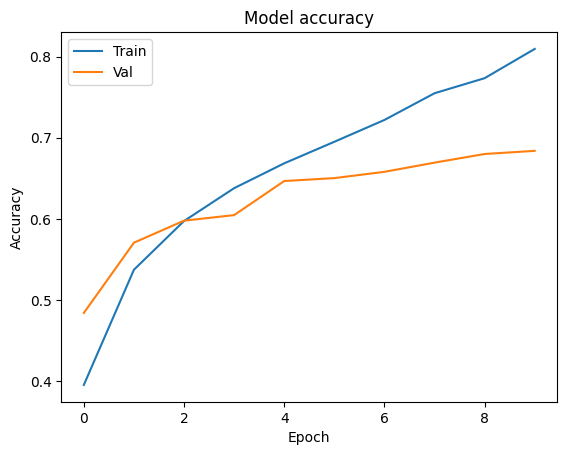

In [24]:
# ****************** Visualize the models accuracy ****************
# Visualize the models accuracy for both the training and validation data.
#Visualize the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


![alt text](https://miro.medium.com/max/1624/1*wAhjmekNY8yn2K3eXheFUA.png)

A visualization of the models accuracy for training and validation set

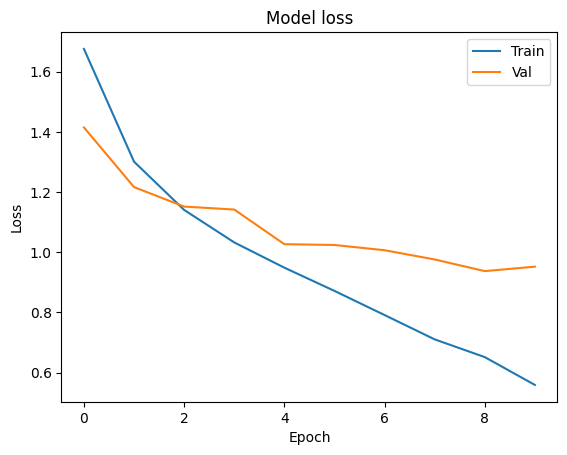

In [25]:
# Visualize the models loss for both the training and validation data
#Visualize the models loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

![alt text](https://miro.medium.com/max/1654/1*F0bMAIPluwHSgowJmqCWrA.png)

A visualization of the models loss for training and validation set

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
# ------------------------ TEST Model Verification -----------------------------
#
# ************************ Load the data ***************************************
# Load the data that you want to classify from an image file into the variable:
# my_image.
#from google.colab import files # Use to load data on Google Colab
# my_image = plt.imread("cat.jpg") #Read in the image (3, 14, 20)
#from google.colab import files
#from IPython.display import Image
#uploaded = files.upload()

# Display Image
#img = mpimg.imread("cat.png")
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
my_image=mpimg.imread('/content/drive/MyDrive/UT/TiranaCV2025/dog.png')

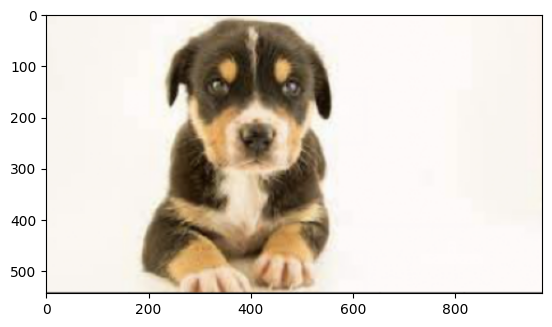

In [31]:
#Show the image
plt.imshow(my_image)

Image of a dog that was uploaded

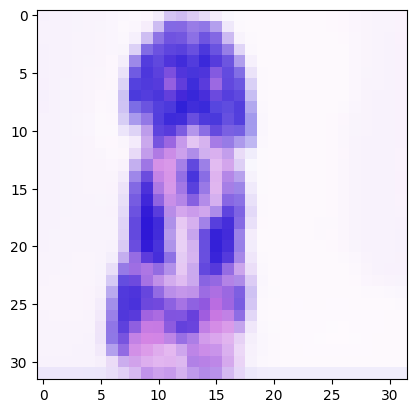

In [32]:
# ********************* Resize the image **************************************
# Resize the image to a 32 x 32 pixel image with depth = 3, and show the image.
from skimage.transform import resize
my_image_resized = resize(my_image, (32,32,3))
plt.imshow(my_image_resized)

The resized image

In [33]:
# ******************** Probabilties ********************************************
# Get the probabilities for each class and store it into a variable.
import numpy as np
probabilities = model.predict(np.array( [my_image_resized,] ))
# Show the probabilities
probabilities

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


array([[9.2756435e-02, 1.4640509e-04, 2.4500015e-01, 3.2850489e-02,
        2.6401669e-02, 9.6422486e-02, 1.0185649e-03, 4.6654946e-01,
        3.8635522e-02, 2.1879570e-04]], dtype=float32)

In [34]:
# ******************* Add label ************************************************
# Add the label of the classes to an array in the index of the labels corresponding equivalent number.
# For example ‘airplane’ will be located at index=0 , because the corresponding
# label as a number is 0.
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [35]:
# ******************* Sort probabilities ***************************************
# Sort the probabilities from least to greatest such that the highest
# probability is at index=9 and the lowest probability is at index = 0.
index = np.argsort(probabilities[0,:])

In [36]:
# ****************** Print probabilities ***************************************
# Print the first 5 most likely classes and the corresponding probability.
print("Most likely class:", number_to_class[index[9]], "-- Probability:", probabilities[0,index[9]])
print("Second most likely class:", number_to_class[index[8]], "-- Probability:", probabilities[0,index[8]])
print("Third most likely class:", number_to_class[index[7]], "-- Probability:", probabilities[0,index[7]])
print("Fourth most likely class:", number_to_class[index[6]], "-- Probability:", probabilities[0,index[6]])
print("Fifth most likely class:", number_to_class[index[5]], "-- Probability:", probabilities[0,index[5]])
print("Fifth most likely class:", number_to_class[index[4]], "-- Probability:", probabilities[0,index[4]])
print("Fifth most likely class:", number_to_class[index[3]], "-- Probability:", probabilities[0,index[3]])
print("Fifth most likely class:", number_to_class[index[2]], "-- Probability:", probabilities[0,index[2]])
print("Fifth most likely class:", number_to_class[index[1]], "-- Probability:", probabilities[0,index[1]])
print("Fifth most likely class:", number_to_class[index[0]], "-- Probability:", probabilities[0,index[0]])

Most likely class: horse -- Probability: 0.46654946
Second most likely class: bird -- Probability: 0.24500015
Third most likely class: dog -- Probability: 0.096422486
Fourth most likely class: airplane -- Probability: 0.092756435
Fifth most likely class: ship -- Probability: 0.038635522
Fifth most likely class: cat -- Probability: 0.03285049
Fifth most likely class: deer -- Probability: 0.026401669
Fifth most likely class: frog -- Probability: 0.0010185649
Fifth most likely class: truck -- Probability: 0.0002187957
Fifth most likely class: automobile -- Probability: 0.00014640509


In [38]:
# ******************* Save Model ***********************************************
# Looks like this model was able to accurately classify the given image as a cat
# with 94.89 % likelihood. This is good, but from the metrics that were gathered
# earlier, this model isn’t very accurate, it has an accuracy of only 67.36%.
# So although the accuracy is better than guessing it could still benefit
# greatly with possibly more training data, and some fine tuning of the model.

#Let’s save this model for later use.
#To save this model
model.save('/content/drive/MyDrive/UT/TiranaCV2025/my_model.h5')

In [39]:
# ****************** Load model ************************************************
# To load this model later, without having to train a brand new one,
# you can do the following.
#To load this model
from keras.models import load_model
model = load_model('/content/drive/MyDrive/UT/TiranaCV2025/my_model.h5')